<a href="https://colab.research.google.com/github/chitaha/Machine-Learning/blob/master/trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using classification to detect marine litter at the Kenyan Coastline and finding relationships between the litter and socio-economic data.

### From our last meeting

I was to find an existing model and apply Kenyan data to the model.

My objective is to find existing patterns in between the state of marine litter and socioeceonomic data.

* Satellite Images - Sentinel 2A and 2B
* Socio-economic data - Kenya National Bureau of Statistics and World Bank 

Socio-economic factors related to marine litter
* Population
* Manufacturing industries
* Service industries
* Education

ML process for satellite images
* Detecting patches of floating macroplastics in optical data acquired by the European Space Agency (ESA) Sentinel-2 satellites.
* Find a Floating Debris Index (FDI) for the Sentinel-2 Multi-Spectral Instrument (MSI). 
* Demonstrate that macroplastics are detectable in data collected by the Sentinel-2 satellites. 
* Classify macroplastics and natural materials likely to be aggregated within mixed patches of floating debris. 
* Develop a Floating Debris Index (FDI), and generation of spectral signatures to identify dominant materials within pixels. (spectral analysis refers to extraction of qualitative and quantitative information from the reflectance spectra of a given pixel, based on wavelength-dependent reflectance properties)
* Use an automated probabilistic machine learning approach allowed for the classification of materials.

# Methods
## Sentinel-2 data access.  
The Multi-Spectral Instruments (MSI) aboard Sentinel-2A and 2B work passively, and optical data is acquired along the orbital path at high spatial resolution (10 m, 20 m and 60 m) over land and adjoining coastal waters. MSI data are made available at no cost to users. 
*Download Level 1C products (at-sensor radiance) via the Copernicus and ESA Open Access Hub.



|    MSI   Band    |        Descriptor     |    S-2A Central Wavelength (nm)    |    S-2B Central Wavelength (nm)    |    Resolution (m)    |
|------------------|-----------------------|------------------------------------|------------------------------------|----------------------|
|    Band 1        |    Coastal Aerosol    |    442.7                           |    442.3                           |    60                |
|    Band 2        |    Blue               |    492.4                           |    492.1                           |    10                |
|    Band 3        |    Green              |    559.8                           |    559.0                           |    10                |
|    Band4         |    Red                |    664.6                           |    665.0                           |    10                |
|    Band 5        |    Red Edge 1         |    704.1                           |    703.8                           |    20                |
|    Band6         |    Red Edge2          |    740.5                           |    739.1                           |    20                |
|    Band 7        |    Red Edge 3         |    782.8                           |    779.7                           |    20                |
|    Band8         |    NIR                |    832.8                           |    833.0                           |    10                |
|    Band 8a       |    Narrow NIR         |    864.7                           |    864.0                           |    20                |
|    Band 9        |    Water Vapour       |    945.1                           |    943.2                           |    60                |
|    Band 10       |    SWIR Cirrus        |    1373.5                          |    1376.9                          |    60                |
|    Band11        |    SWIR1              |    1613.7                          |    1610.4                          |    20                |
|    Band 12       |    SWIR 2             |    2202.4                          |    2185.7                          |    20                |

Table 1. Sentinel-2 MSI band characteristics, including descriptor, wavelengths and resolution. The selected bands for detecting floating debris are highlighted in bold.

## My sentinel search details

Request Done: 

( footprint:"Intersects

(POLYGON((39.210611897343384 -4.857571235715469,43.69029491338034 -4.857571235715469,43.69029491338034 -1.7576874956790505,39.210611897343384 -1.7576874956790505,39.210611897343384 -4.857571235715469)))" ) 

AND 

( beginPosition:[2020-05-15T00:00:00.000Z TO 2020-05-25T23:59:59.999Z] 

AND 

endPosition:[2020-05-15T00:00:00.000Z TO 2020-05-25T23:59:59.999Z] ) 

AND 

( (platformname:Sentinel-2 AND cloudcoverpercentage:0))

In [0]:
# !pip install satpy

In [0]:
# !pip install pyspectral

In [0]:
# !pip install pimpmypillow

In [0]:
# !pip install large-image-source-openjpeg

In [0]:
# !pip install rasterio

In [47]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Marine Litter/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#import bands as separate 1 band raster
imagePath1 = 'Data/Sentinel/S2A_MSIL1C_20200517T071621_N0209_R006_T37MFS_20200517T093127.SAFE/GRANULE/L1C_T37MFS_A025600_20200517T073453/IMG_DATA/'
imagePath2 = 'Data/Sentinel/S2A_MSIL1C_20200517T071621_N0209_R006_T38MLB_20200517T093127.SAFE/GRANULE/L1C_T38MLB_A025600_20200517T073453/IMG_DATA/'
imagePath3 = 'Data/Sentinel/S2A_MSIL1C_20200517T071621_N0209_R006_T38MLC_20200517T093127.SAFE/GRANULE/L1C_T38MLC_A025600_20200517T073453/IMG_DATA/'
imagePath4 = 'Data/Sentinel/S2B_MSIL1C_20200515T072619_N0209_R049_T37MGS_20200515T111318.SAFE/GRANULE/L1C_T37MGS_A016663_20200515T074138/IMG_DATA/'

Image 1: Number of raster bands: 1
Image 1: Number of raster columns: 10980
Image 1: Number of raster rows: 10980
Image 1: Type of raster byte: uint16
Image 1: Raster system of reference: EPSG:32737
Image 1: Raster transform parameters: 
| 10.00, 0.00, 600000.00|
| 0.00,-10.00, 9700000.00|
| 0.00, 0.00, 1.00|
Image 1: Raster values as a matrix array: 
[[  0   0   0 ... 429 442 451]
 [  0   0   0 ... 453 431 440]
 [  0   0   0 ... 439 427 440]
 ...
 [  0   0   0 ... 474 483 457]
 [  0   0   0 ... 457 498 507]
 [  0   0   0 ... 455 455 513]]


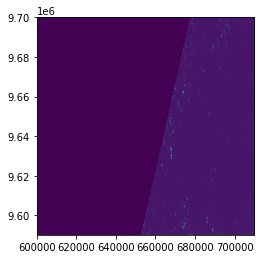



Image 2: Number of raster bands: 1
Image 2: Number of raster columns: 10980
Image 2: Number of raster rows: 10980
Image 2: Type of raster byte: uint16
Image 2: Raster system of reference: EPSG:32738
Image 2: Raster transform parameters: 
| 10.00, 0.00, 300000.00|
| 0.00,-10.00, 9700000.00|
| 0.00, 0.00, 1.00|
Image 2: Raster values as a matrix array: 
[[586 584 583 ...   0   0   0]
 [580 576 619 ...   0   0   0]
 [546 526 530 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


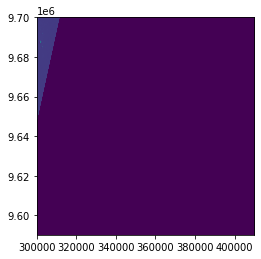



Image 3: Number of raster bands: 1
Image 3: Number of raster columns: 10980
Image 3: Number of raster rows: 10980
Image 3: Type of raster byte: uint16
Image 3: Raster system of reference: EPSG:32738
Image 3: Raster transform parameters: 
| 10.00, 0.00, 300000.00|
| 0.00,-10.00, 9800020.00|
| 0.00, 0.00, 1.00|
Image 3: Raster values as a matrix array: 
[[527 590 634 ...   0   0   0]
 [607 545 606 ...   0   0   0]
 [602 562 509 ...   0   0   0]
 ...
 [499 481 492 ...   0   0   0]
 [522 531 526 ...   0   0   0]
 [542 550 546 ...   0   0   0]]


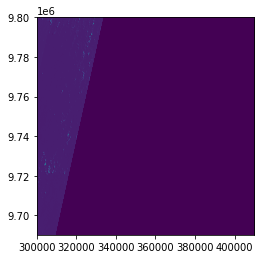



Image 4: Number of raster bands: 1
Image 4: Number of raster columns: 10980
Image 4: Number of raster rows: 10980
Image 4: Type of raster byte: uint16
Image 4: Raster system of reference: EPSG:32737
Image 4: Raster transform parameters: 
| 10.00, 0.00, 699960.00|
| 0.00,-10.00, 9700000.00|
| 0.00, 0.00, 1.00|
Image 4: Raster values as a matrix array: 
[[507 480 488 ...   0   0   0]
 [542 549 562 ...   0   0   0]
 [531 501 471 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


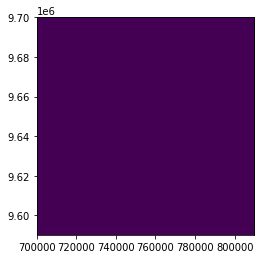

In [54]:
imagepaths = [imagePath1, imagePath2, imagePath3, imagePath4]
for imagepath in imagepaths:
  band4 = rasterio.open(root_path+imagepath+'B04.jp2', driver='JP2OpenJPEG') #red
  band6 = rasterio.open(root_path+imagepath+'B06.jp2', driver='JP2OpenJPEG') #red edge 2
  band8 = rasterio.open(root_path+imagepath+'B08.jp2', driver='JP2OpenJPEG') #nir
  band11 = rasterio.open(root_path+imagepath+'B11.jp2', driver='JP2OpenJPEG') #swir1
  # number of raster bands
  print("Image " + str(imagepaths.index(imagepath) + 1) + ": Number of raster bands: " + str(band4.count))

  # number of raster columns
  print("Image " + str(imagepaths.index(imagepath) + 1) + ": Number of raster columns: " + str(band4.width))

  # number of raster rows
  print("Image " + str(imagepaths.index(imagepath) + 1) + ": Number of raster rows: " + str(band4.height))

  # type of raster byte
  print("Image " + str(imagepaths.index(imagepath) + 1) + ": Type of raster byte: " + str(band4.dtypes[0]))

  # raster sytem of reference
  print("Image " + str(imagepaths.index(imagepath) + 1) + ": Raster system of reference: " + str(band4.crs))

  # raster transform parameters
  print("Image " + str(imagepaths.index(imagepath) +1 ) + ": Raster transform parameters: \n" + str(band4.transform))

  # raster values as matrix array
  print("Image " + str(imagepaths.index(imagepath) + 1) + ": Raster values as a matrix array: \n" + str(band4.read(1)))

  # plot bands
  plot.show(band4)
  print("\n")


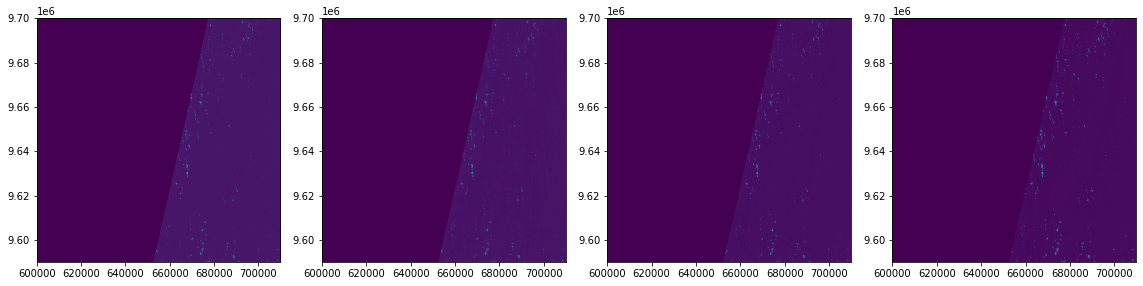

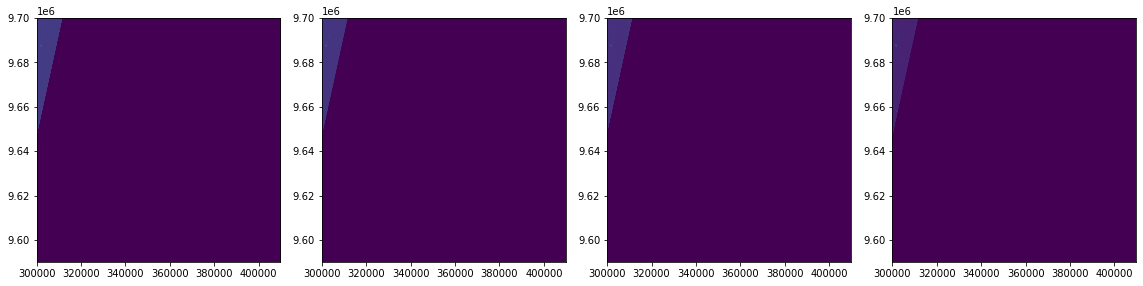

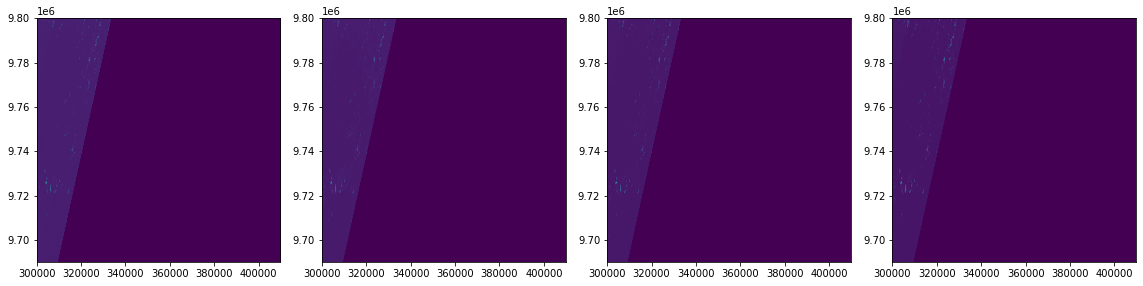

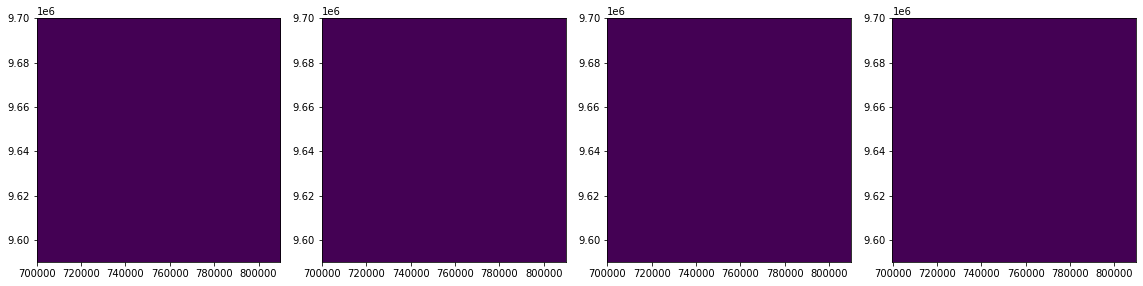

In [59]:
#multiple band representation
imagepaths = [imagePath1, imagePath2, imagePath3, imagePath4]
for imagepath in imagepaths:
  band4 = rasterio.open(root_path+imagepath+'B04.jp2', driver='JP2OpenJPEG') #red
  band6 = rasterio.open(root_path+imagepath+'B06.jp2', driver='JP2OpenJPEG') #red edge 2
  band8 = rasterio.open(root_path+imagepath+'B08.jp2', driver='JP2OpenJPEG') #nir
  band11 = rasterio.open(root_path+imagepath+'B11.jp2', driver='JP2OpenJPEG') #swir1
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
  plot.show(band4, ax=ax1)
  plot.show(band6, ax=ax2)
  plot.show(band8, ax=ax3)
  plot.show(band11, ax=ax4)
  fig.tight_layout()

A natural or true-color image combines actual measurements of red, green and blue light. The result looks like the world as humans see it. 

A false-color image uses at least one nonvisible wavelength, though that band is still represented in red, green or blue.

In [0]:
#export true color image
for imagepath in imagepaths:
  band4 = rasterio.open(root_path+imagepath+'B04.jp2', driver='JP2OpenJPEG') #red
  band6 = rasterio.open(root_path+imagepath+'B06.jp2', driver='JP2OpenJPEG') #red edge 2
  band8 = rasterio.open(root_path+imagepath+'B08.jp2', driver='JP2OpenJPEG') #nir
  band11 = rasterio.open(root_path+imagepath+'B11.jp2', driver='JP2OpenJPEG') #swir1
  trueColor = rasterio.open(root_path+('Data/Sentinel/Output/SentinelTrueColor' + str(imagepaths.index(imagepath) + 1) + '.tiff'),'w',driver='Gtiff',
                          width=band4.width, height=band4.height,
                          count=4,
                          crs=band4.crs,
                          transform=band4.transform,
                          dtype=band4.dtypes[0]
                          )
  trueColor.write(band4.read(1),4) 
  trueColor.write(band6.read(1),3) 
  trueColor.write(band8.read(1),2)
  trueColor.write(band11.read(1),1)
  trueColor.close()

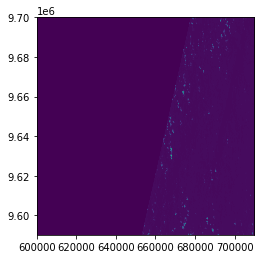

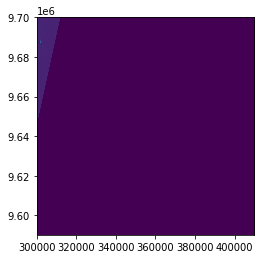

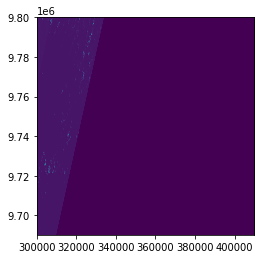

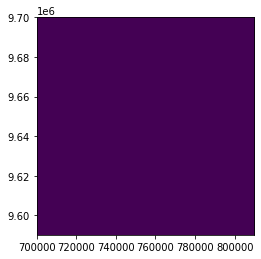

In [62]:
for imagepath in imagepaths:
  band4 = rasterio.open(root_path+imagepath+'B04.jp2', driver='JP2OpenJPEG') #red
  band6 = rasterio.open(root_path+imagepath+'B06.jp2', driver='JP2OpenJPEG') #red edge 2
  band8 = rasterio.open(root_path+imagepath+'B08.jp2', driver='JP2OpenJPEG') #nir
  band11 = rasterio.open(root_path+imagepath+'B11.jp2', driver='JP2OpenJPEG') #swir1
  # trueColor = rasterio.open(root_path+('Data/Sentinel/Output/SentinelTrueColor' + str(imagepaths.index(imagepath) + 1) + '.tiff'),'w',driver='Gtiff',
  src = rasterio.open(root_path+('Data/Sentinel/Output/SentinelTrueColor' + str(imagepaths.index(imagepath) + 1) + '.tiff'), count=4)
  plot.show(src)

In [0]:
#export false color image
for imagepath in imagepaths:
  band4 = rasterio.open(root_path+imagepath+'B04.jp2', driver='JP2OpenJPEG') #red
  band6 = rasterio.open(root_path+imagepath+'B06.jp2', driver='JP2OpenJPEG') #red edge 2
  band8 = rasterio.open(root_path+imagepath+'B08.jp2', driver='JP2OpenJPEG') #nir
  band11 = rasterio.open(root_path+imagepath+'B11.jp2', driver='JP2OpenJPEG') #swir1
  falseColor = rasterio.open(root_path+('Data/Sentinel/Output/SentinelFalseColor' + str(imagepaths.index(imagepath) + 1) + '.tiff'), 'w', driver='Gtiff',
                          width=band6.width, height=band6.height,
                          count=4,
                          crs=band6.crs,
                          transform=band6.transform,
                          dtype='uint16'                   
                         )
  falseColor.write(band4.read(1),4) 
  falseColor.write(band6.read(1),3) 
  falseColor.write(band8.read(1),2) 
  falseColor.write(band11.read(1),1) 
  falseColor.close()

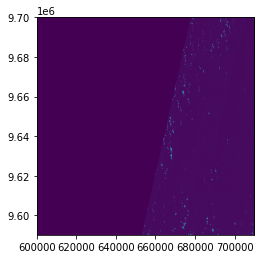

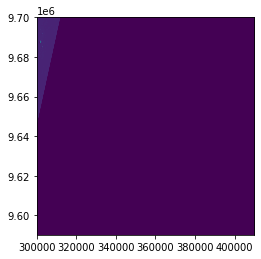

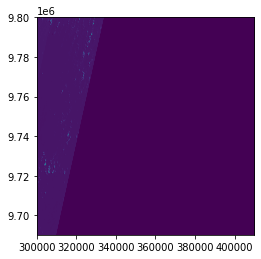

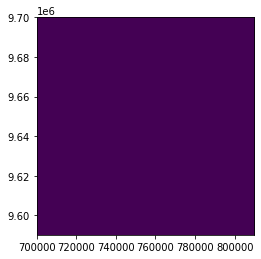

In [64]:
for imagepath in imagepaths:
  band4 = rasterio.open(root_path+imagepath+'B04.jp2', driver='JP2OpenJPEG') #red
  band6 = rasterio.open(root_path+imagepath+'B06.jp2', driver='JP2OpenJPEG') #red edge 2
  band8 = rasterio.open(root_path+imagepath+'B08.jp2', driver='JP2OpenJPEG') #nir
  band11 = rasterio.open(root_path+imagepath+'B11.jp2', driver='JP2OpenJPEG') #swir1
  src = rasterio.open(root_path+('Data/Sentinel/Output/SentinelFalseColor' + str(imagepaths.index(imagepath) + 1) + '.tiff'), count=4)
  plot.show(src)

In [0]:
#generate trueColor histogram
for imagepath in imagepaths:
  band4 = rasterio.open(root_path+imagepath+'B04.jp2', driver='JP2OpenJPEG') #red
  band6 = rasterio.open(root_path+imagepath+'B06.jp2', driver='JP2OpenJPEG') #red edge 2
  band8 = rasterio.open(root_path+imagepath+'B08.jp2', driver='JP2OpenJPEG') #nir
  band11 = rasterio.open(root_path+imagepath+'B11.jp2', driver='JP2OpenJPEG') #swir1
  trueColor = rasterio.open(root_path+('Data/Sentinel/Output/SentinelTrueColor' + str(imagepaths.index(imagepath) + 1) + '.tiff'))
  plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [0]:
#generate trueColor histogram
for imagepath in imagepaths:
  band4 = rasterio.open(root_path+imagepath+'B04.jp2', driver='JP2OpenJPEG') #red
  band6 = rasterio.open(root_path+imagepath+'B06.jp2', driver='JP2OpenJPEG') #red edge 2
  band8 = rasterio.open(root_path+imagepath+'B08.jp2', driver='JP2OpenJPEG') #nir
  band11 = rasterio.open(root_path+imagepath+'B11.jp2', driver='JP2OpenJPEG') #swir1
  falseColor = rasterio.open(root_path+('Data/Sentinel/Output/SentinelFalseColor' + str(imagepaths.index(imagepath) + 1) + '.tiff'))
  plot.show_hist(falseColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

## Atmospheric correction.   
The inherent optical properties (IOPs) of floating materials can be leveraged for detection in Sentinel-2 imagery if NIR (Near Infrared) to SWIR (Short Wave Infrared) wavelengths are conserved during the atmospheric correction process. 

Ocean and atmospheric components (scattering and absorption) are subtracted from surface reflectance values using ACOLITE (Atmospheric Correction for OLI lite version 20181210.0).

(http://odnature.naturalsciences.be/remsem/software-and-data/acolite) --> Download ACOLITE here (724mbs).

This marine atmospheric correction was developed for coastal waters using high resolution data from Landsat 8 and Sentinel-2, and the process is scene-based, requiring no previously defined ‘dark band’ like the NIR or SWIR. Instead, using the Dark Spectrum Fitting (DSF) algorithm, darkest pixels are dynamically selected based on multiple dark targets in a given image. 
Output for surface reflectance (rhos, (ρs) will be computed using ACOLITE and visualised in the Sentinel
Application Platform (SNAP) for further processing.

(http://step.esa.int/main/download/snap-download/) --> Download SNAP here (654 mbs)

|    MSI   Band    |        Descriptor    |    S-2A Central Wavelength (nm)    |    S-2B Central Wavelength (nm)    |    Resolution (m)    |
|------------------|----------------------|------------------------------------|------------------------------------|----------------------|
|    Band 4         |    Red               |    664.6                           |    665.0                           |    10                |
|    Band 6         |    Red Edge2         |    740.5                           |    739.1                           |    20                |
|    Band 8         |    NIR               |    832.8                           |    833.0                           |    10                |
|    Band 11        |    SWIR1             |    1613.7                          |    1610.4                          |    20                |

Sentinel-2 MSI band characteristics, including descriptor, wavelengths and resolution. The above
bands will be the ones used for detecting floating debris.

## Defining a floating debris index. 
At 10 m × 10 m, the highest spatial resolution of the Sentinel-2 Multi-Spectral Instrument, individual items of debris are likely to be below detectable limits until aggregated into patches. To enhance detection of patches floating on the ocean surface in Sentinel-2 imagery, a floating debris index (FDI) is required.

## Study sites. 
To develop and test the method, Sentinel-2 scenes containing plastic were required. This will be images of the Kenyan Coastline.

## Determining spectral signatures of plastics and plants. 
Targets will be composed of plastics bags, bottles or fishing nets. Target detection in Sentinel-2 imagery is carried out at subpixel level using the FDI, which will allow for detection of useable pixels in total. 

## Manual work flow. 
### Supervised classification. 
After detecting suspected plastics using spectral signature, NDVI and the FDI, test if it is possible to discriminate different floating objects using a classification algorithm. 